<h2> Demo: Implementing XGBoost using Python </h2>

In this demo, you will learn how to apply XGBoost using Python.

# Problem Statement

Details of NBA rookies to classify their career longevity more than 5 years or not.

# Dataset

<b>NBA.csv</b> is the dataset that has details of NBA rookies along with their career longevity either more than 5 years or not:
- __Name__: Name of the players
- __GP__: Games played 
- __MIN__: Total minutes played
- __PTS__: Points per game
- __FGM__: Field goals made
- __FGA__: Field goals attempted
- __FG%__: Field goals percent
- __3P Made__: 3 Points made
- __3PA__: 3 Points attempted
- __3P%__: 3 Points percentage
- __FTM__: Free throw made
- __FTA__: Free throw attempted
- __FT%__: Free throw percentage
- __OREB__: Offensive rebounds
- __DREB__: Defensive rebounds
- __REB__: Rebounds
- __AST__: Assists
- __STL__: Steals
- __BLK__: Blocks
- __TOV__: Turnovers
- __TARGET_5Yrs__: 0 if career years played < 5 |  1 if career years played >= 5

# Importing Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Data Analysis

In [4]:
data=pd.read_csv('NBA.csv')

In [5]:
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [6]:
data.shape

(1340, 21)

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has 1340 rows and 21 columns </span>
</div>

In [5]:
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


<div style="background-color:##EDF9FF">
  <ul><li><h3> Testing For Null Values</h3></li></ul>
</div>

In [6]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
Name,0,0.000000
GP,0,0.000000
MIN,0,0.000000
PTS,0,0.000000
FGM,0,0.000000
FGA,0,0.000000
FG%,0,0.000000
3P Made,0,0.000000
3PA,0,0.000000
3P%,11,0.008209


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has no null values.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [7]:
target_ratio=pd.DataFrame({'Counts':data.TARGET_5Yrs.value_counts(),'Percentage':data.TARGET_5Yrs.value_counts()/len(data)})
target_ratio

,Counts,Percentage
1.0,831,0.620149
0.0,509,0.379851


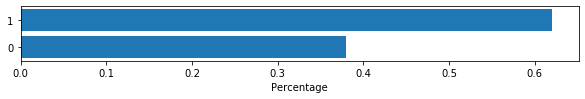

In [8]:
plt.figure(figsize = (10,1))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

<div style="background-color:##EDF9FF">
  <ul><li><h3>Selecting Features</h3></li></ul>
</div>

In [9]:
X=data.drop(['TARGET_5Yrs','Name'],axis=1)
y=data.TARGET_5Yrs

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training And Testing Data</h3></li></ul>
</div>

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=4,test_size=0.3)

# XGBoost Classifier
Further information on XGBoost documentation given below: <a href='https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn'>XGBoost Classifier</a>

In [11]:
xb_clf=XGBClassifier(learning_rate=0.25,n_estimators=100)
xb_clf.fit(X_train,y_train)
xb_pred=xb_clf.predict(X_test)
print(round(accuracy_score(y_test,xb_pred),3))

0.689


*__Conclusion__*: In this demonstration, we have learned how to use XBoost.